## Urdu NLP using different classifiers and vectorizers

In [1]:
import pandas as pd
import numpy as np
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

### Getting data ready

In [129]:
df=pd.read_csv("/content/urdu_sentiment_corpus_v1.csv",usecols=[1,2])
df = df[df['Sentiment']!=2]

In [166]:
df

,Sentiment,tokenized
0,0,"['میں', 'نے', 'ایٹم', 'بم', 'بنایا', 'ھے', 'او..."
1,1,"['چندے', 'سے', 'انقلاب', 'اور', 'عمران', 'خان'..."
3,0,"['سرچ', 'انجن', 'گوگل', 'کے', 'نائب', 'صدر', '..."
4,0,"['ابھی', 'تک', 'اسکی', 'لہریں', 'کبھی', 'کبھی'..."
5,1,"['گندی', 'زبان', 'اور', 'گٹر', 'جیسے', 'دماغ',..."
...,...,...
993,0,"['اس', 'آدمی', 'نے', 'اس', 'سالار', 'کو', 'کاف..."
994,0,"['چچا', 'غالب', 'کی', 'روح', 'سے', 'معذرت', 'ک..."
995,0,"['واہ', 'جناب', 'واہ', 'اچھی', 'رہی', 'جناب', ..."
996,0,"['اسلام', 'آباد', 'پی', 'اے', 'ٹی', 'کا', 'دھر..."


In [131]:
np.random.seed(24)
X_train, X_test, y_train, y_test=train_test_split(df.tokenized,df.Sentiment,test_size=0.2)

In [132]:
X_train.head()

548    ['بہت', 'بہت', 'شکریہ', 'ہم', 'نے', 'تو', 'مٹھ...
576    ['آج', 'کا', 'کارٹون', 'لمبی', 'ٹانگ', 'والا',...
20     ['سہیل', 'بخاری', 'کا', 'کہنا', 'تھا', 'کہ', '...
294    ['ایک', 'جماعت', 'سندھیوں', 'کے', 'جذبات', 'سے...
737    ['دبئی', 'ٹیسٹ', 'پاکستان', 'نے', 'آسٹریلیا', ...
Name: tokenized, dtype: object

### Using TF-IDF Vectorizer

In [133]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_vect = tfidf_vect.transform(X_train)
X_test_vect = tfidf_vect.transform(X_test)

In [134]:
X_test_vect.shape

(196, 3951)

In [135]:
tfidf_vect.vocabulary_

{'بہت': 761,
 'شکریہ': 1907,
 'ہم': 3823,
 'نے': 2827,
 'تو': 895,
 'مٹھائی': 2651,
 'کھانی': 3553,
 'ہے': 3910,
 'آپ': 70,
 'سے': 1842,
 'آج': 23,
 'کا': 3339,
 'کارٹون': 3360,
 'لمبی': 2288,
 'ٹانگ': 2932,
 'والا': 2846,
 'کرکٹر': 3452,
 'پارلیمنٹ': 2981,
 'میں': 2697,
 'کیلن': 3613,
 'بولڈ': 693,
 'ہوتا': 3856,
 'ہوا': 3848,
 'نظر': 2759,
 'ایا': 452,
 'سہیل': 1814,
 'بخاری': 575,
 'کہنا': 3583,
 'تھا': 917,
 'کہ': 3574,
 'تعزیتی': 857,
 'ریفرنس': 1571,
 'یاسین': 3919,
 'ملک': 2596,
 'کے': 3631,
 'قریبی': 2217,
 'دوستوں': 1350,
 'کی': 3592,
 'شرکت': 1884,
 'نہ': 2805,
 'کرنے': 3438,
 'پر': 3013,
 'انہیں': 369,
 'افسوس': 226,
 'ایک': 487,
 'جماعت': 1037,
 'سندھیوں': 1743,
 'جذبات': 1014,
 'کھیل': 3571,
 'رہی': 1560,
 'مہاجر': 2667,
 'قابض': 2198,
 'ہو': 3844,
 'رہے': 1562,
 'ہیں': 3906,
 'جبکہ': 1007,
 'دوسری': 1352,
 'مہاجروں': 2668,
 'سندھی': 1742,
 'دبئی': 1286,
 'ٹیسٹ': 2962,
 'پاکستان': 2997,
 'آسٹریلیا': 41,
 'کو': 3498,
 'رنز': 1496,
 'ہدف': 3810,
 'دے': 1428,
 'دیا': 1389,
 '

In [136]:
# How are these vectors stored?
X_test_vect[0]

<1x3951 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [137]:
# Can we convert the vectors to arrays?
X_test_vect[0].toarray()[:,:20]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [138]:

#Ensemble Method
RFC = RandomForestClassifier().fit(X_train_vect, y_train.values.ravel())

#Linear Model
LR=LogisticRegression().fit(X_train_vect, y_train.values.ravel())

#SVM Classifier
SV=SVC().fit(X_train_vect, y_train.values.ravel())

#Naive Bayes
NV=MultinomialNB().fit(X_train_vect, y_train.values.ravel())

#SGD Classifier

SGC=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3).fit(X_train_vect, y_train.values.ravel())

In [139]:
# Evaluate the predictions of the model on the holdout test set
def score_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred,zero_division=1)
    recall = recall_score(y_test, y_pred)
    print('Model : {}\n \nPrecision: {}  \nRecall: {}  \nAccuracy: {}\n'.format(model,
        round(precision*100, 2), round(recall*100, 2), round((y_pred==y_test).sum()/len(y_pred)*100, 2)))

In [140]:
classifiers=pd.Series([RFC,LR,SV,NV,SGC])

In [141]:
classifiers.apply(lambda x: score_model(x,X_test_vect,y_test))

Model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
 
Precision: 58.59  
Recall: 55.77  
Accuracy: 55.61

Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 
Precision: 62.18  
Recall: 71.15  
Accuracy: 61.73

Mod

0    None
1    None
2    None
3    None
4    None
dtype: object

### Using Word2Vec:

In [142]:
# Train a basic word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   size=100,
                                   window=3,
                                   min_count=2)

In [143]:
# Replace the words in each text message with the learned word vector
words = set(w2v_model.wv.index2word)
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])

In [144]:
# Average the word vectors for each sentence (and assign a vector of zeros if the model
# did not learn any of the words in the text message during training
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [145]:
# What does the unaveraged version look like?
X_train_vect[0]

array([[ 0.0296436 ,  0.08816261,  0.19621971, ...,  0.00897557,
         0.07395522,  0.04502581],
       [-0.03835845,  0.15513374,  0.1739647 , ..., -0.09057296,
         0.0280229 ,  0.02909189],
       [ 0.00880979,  0.055814  ,  0.176111  , ..., -0.01149543,
         0.05822272,  0.05695001],
       ...,
       [ 0.04763241,  0.04246939,  0.1757745 , ..., -0.02661215,
         0.05484041, -0.00259667],
       [-0.03835845,  0.15513374,  0.1739647 , ..., -0.09057296,
         0.0280229 ,  0.02909189],
       [ 0.03139703,  0.06196774,  0.17387478, ...,  0.00313794,
         0.04426207,  0.02455479]], dtype=float32)

In [146]:
# What does the averaged version look like?
X_train_vect_avg[0]

array([ 0.02497519,  0.08449012,  0.17366277, -0.11585072,  0.18541284,
        0.01373511,  0.10636689,  0.0320175 ,  0.0889444 , -0.16798124,
        0.00678168, -0.11400126, -0.07876102, -0.18132582, -0.1851841 ,
       -0.03046911, -0.1536788 , -0.06959068, -0.28005937, -0.02690024,
        0.07406981,  0.14563659,  0.08105218, -0.0113414 , -0.0916505 ,
       -0.06274436,  0.11173401, -0.10693628,  0.10214009, -0.02960573,
       -0.03616226, -0.0180572 ,  0.03952086,  0.07018135,  0.05746759,
        0.08748919,  0.13125785, -0.02395279,  0.05472977, -0.02087248,
       -0.08766504,  0.02216381,  0.19146019, -0.09216122,  0.20000924,
        0.06679303, -0.01596673,  0.04147781, -0.13064323,  0.27789313,
        0.00827746,  0.00841776,  0.00767805,  0.05114162,  0.1607745 ,
       -0.05529921, -0.01280018, -0.08600505,  0.08242231,  0.18909995,
       -0.15893196, -0.0061441 , -0.17785914,  0.10056746, -0.04308026,
       -0.20244718, -0.22766732,  0.13331558,  0.14379904, -0.04

In [147]:
np.random.seed(42)
# train model

#Ensemble Method
RFC = RandomForestClassifier().fit(X_train_vect_avg, y_train.values.ravel())

#Linear Model
LR=LogisticRegression().fit(X_train_vect_avg, y_train.values.ravel())

#SVM Classifier
SV=SVC().fit(X_train_vect_avg, y_train.values.ravel())


#SGD Classifier

SGC=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3).fit(X_train_vect_avg, y_train.values.ravel())

In [148]:
classifiers_w2v=pd.Series([RFC,LR,SV,SGC])

In [149]:
classifiers_w2v.apply(lambda x: score_model(x,X_test_vect_avg,y_test))

Model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
 
Precision: 52.46  
Recall: 61.54  
Accuracy: 50.0

Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 
Precision: 53.06  
Recall: 100.0  
Accuracy: 53.06

Mode

0    None
1    None
2    None
3    None
dtype: object

### Usind doc2vec: 

In [150]:
# Created TaggedDocument vectors for each text message in the training and test sets
tagged_docs_train = [gensim.models.doc2vec.TaggedDocument(v, [i])
                     for i, v in enumerate(X_train)]
tagged_docs_test = [gensim.models.doc2vec.TaggedDocument(v, [i])
                    for i, v in enumerate(X_test)]

In [151]:
# What do these TaggedDocument objects look like?
tagged_docs_train[:10]

[TaggedDocument(words="['بہت', 'بہت', 'شکریہ', 'ہم', 'نے', 'تو', 'مٹھائی', 'کھانی', 'ہے', 'آپ', 'سے']", tags=[0]),
 TaggedDocument(words="['آج', 'کا', 'کارٹون', 'لمبی', 'ٹانگ', 'والا', 'کرکٹر', 'پارلیمنٹ', 'میں', 'کیلن', 'بولڈ', 'ہوتا', 'ہوا', 'نظر', 'ایا']", tags=[1]),
 TaggedDocument(words="['سہیل', 'بخاری', 'کا', 'کہنا', 'تھا', 'کہ', 'تعزیتی', 'ریفرنس', 'میں', 'یاسین', 'ملک', 'کے', 'قریبی', 'دوستوں', 'کی', 'شرکت', 'نہ', 'کرنے', 'پر', 'انہیں', 'بہت', 'افسوس', 'ہے']", tags=[2]),
 TaggedDocument(words="['ایک', 'جماعت', 'سندھیوں', 'کے', 'جذبات', 'سے', 'کھیل', 'رہی', 'ہے', 'کہ', 'مہاجر', 'قابض', 'ہو', 'رہے', 'ہیں', 'جبکہ', 'دوسری', 'جماعت', 'مہاجروں', 'کے', 'جذبات', 'سے', 'کہ', 'سندھی', 'قابض', 'ہو', 'رہے', 'ہیں']", tags=[3]),
 TaggedDocument(words="['دبئی', 'ٹیسٹ', 'پاکستان', 'نے', 'آسٹریلیا', 'کو', 'رنز', 'کا', 'ہدف', 'دے', 'دیا', 'اسٹریلیا', 'رنز', 'بنا', 'نقصان', 'کے']", tags=[4]),
 TaggedDocument(words="['انشا', 'جی', 'اٹھو', 'اب', 'کوچ', 'کرو', 'اس', 'شہر', 'میں', 'جی', 'کا', 'لگان

In [152]:
# Train a basic doc2vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs_train,
                                  vector_size=100,
                                  window=5,
                                  min_count=2)

In [153]:
# Infer the vectors to be used in training and testing
train_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_train]
test_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_test]   

In [154]:
np.random.seed(42)
# train model

#Ensemble Method
RFC = RandomForestClassifier().fit(train_vectors, y_train.values.ravel())

#Linear Model
LR=LogisticRegression().fit(train_vectors, y_train.values.ravel())

#SVM Classifier
SV=SVC().fit(train_vectors, y_train.values.ravel())


#SGD Classifier

SGC=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3).fit(train_vectors, y_train.values.ravel())

In [155]:
classifiers_w2d=pd.Series([RFC,LR,SV,SGC])


In [156]:
classifiers_w2d.apply(lambda x: score_model(x,test_vectors,y_test))

Model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
 
Precision: 55.66  
Recall: 56.73  
Accuracy: 53.06

Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 
Precision: 53.23  
Recall: 95.19  
Accuracy: 53.06

Mod

0    None
1    None
2    None
3    None
dtype: object

### Using RNN 

In [157]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [158]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 60)
X_test_seq_padded = pad_sequences(X_test_seq, 60)

In [159]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [160]:
# Construct our basic RNN model framework
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, 64))
model.add(LSTM(64, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          254336    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 289,473
Trainable params: 289,473
Non-trainable params: 0
_________________________________________________________________


In [161]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [164]:
# Fit the RNN
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=12,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/12
7/7 [==============================] - 0s 71ms/step - loss: 0.0072 - accuracy: 0.9974 - precision_m: 1.0000 - recall_m: 0.9956 - val_loss: 1.4610 - val_accuracy: 0.6276 - val_precision_m: 0.6467 - val_recall_m: 0.6284
Epoch 2/12
7/7 [==============================] - 0s 68ms/step - loss: 0.0067 - accuracy: 0.9974 - precision_m: 0.9982 - recall_m: 0.9975 - val_loss: 1.5084 - val_accuracy: 0.6173 - val_precision_m: 0.6334 - val_recall_m: 0.6284
Epoch 3/12
7/7 [==============================] - 0s 68ms/step - loss: 0.0059 - accuracy: 0.9974 - precision_m: 0.9977 - recall_m: 0.9979 - val_loss: 1.5451 - val_accuracy: 0.6276 - val_precision_m: 0.6466 - val_recall_m: 0.6415
Epoch 4/12
7/7 [==============================] - 0s 69ms/step - loss: 0.0059 - accuracy: 0.9962 - precision_m: 0.9956 - recall_m: 0.9977 - val_loss: 1.5799 - val_accuracy: 0.6224 - val_precision_m: 0.6439 - val_recall_m: 0.6340
Epoch 5/12
7/7 [==============================] - 0s 68ms/step - loss: 0.0057 - accu

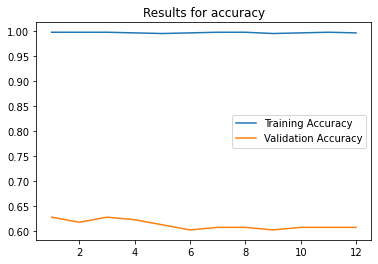

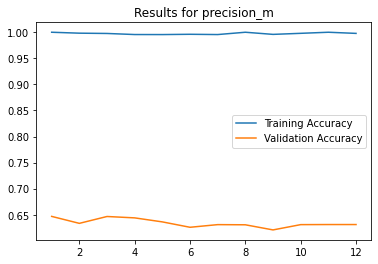

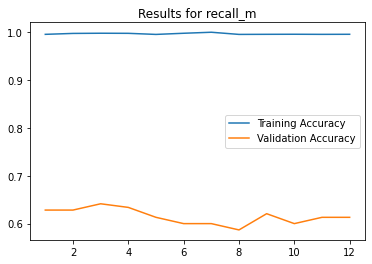

In [165]:
# Plot basic evaluation metrics across epochs
import matplotlib.pyplot as plt
%matplotlib inline

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()